# Microsoft资讯推荐数据集

## 1.数据获取与预处理

In [54]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

# Temporary folder for data we need during execution of this notebook (we'll clean up
# at the end, we promise)
temp_dir = os.path.join(tempfile.gettempdir(), 'mind')
os.makedirs(temp_dir, exist_ok=True)

# The dataset is split into training and validation set, each with a large and small version.
# The format of the four files are the same.
# For demonstration purpose, we will use small version validation set only.
base_url = 'https://mind201910small.blob.core.windows.net/release'
training_small_url = f'{base_url}/MINDsmall_train.zip'
validation_small_url = f'{base_url}/MINDsmall_dev.zip'
training_large_url = f'{base_url}/MINDlarge_train.zip'
validation_large_url = f'{base_url}/MINDlarge_dev.zip'

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


数据集下载

In [55]:
def download_url(url,
                 destination_filename=None,
                 progress_updater=None,
                 force_download=False,
                 verbose=True):
    """
    Download a URL to a temporary file
    """
    if not verbose:
        progress_updater = None
    # This is not intended to guarantee uniqueness, we just know it happens to guarantee
    # uniqueness for this application.
    if destination_filename is None:
        url_as_filename = url.replace('://', '_').replace('/', '_')
        destination_filename = \
            os.path.join(temp_dir,url_as_filename)
    if (not force_download) and (os.path.isfile(destination_filename)):
        if verbose:
            print('Bypassing download of already-downloaded file {}'.format(
                os.path.basename(url)))
        return destination_filename
    if verbose:
        print('Downloading file {} to {}'.format(os.path.basename(url),
                                                 destination_filename),
              end='')
    urllib.request.urlretrieve(url, destination_filename, progress_updater)
    assert (os.path.isfile(destination_filename))
    nBytes = os.path.getsize(destination_filename)
    if verbose:
        print('...done, {} bytes.'.format(nBytes))
    return destination_filename

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# For demonstration purpose, we will use small version validation set only.
# This file is about 30MB.
zip_path = download_url(validation_small_url, verbose=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp_dir)

os.listdir(temp_dir)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bypassing download of already-downloaded file MINDsmall_dev.zip


['behaviors.tsv',
 'news.tsv',
 'https_mind201910small.blob.core.windows.net_release_MINDsmall_dev.zip',
 'entity_embedding.vec',
 'relation_embedding.vec']

数据集格式展示

In [57]:
# The behaviors.tsv file contains the impression logs and users' news click histories. 
# It has 5 columns divided by the tab symbol:
# - Impression ID. The ID of an impression.
# - User ID. The anonymous ID of a user.
# - Time. The impression time with format "MM/DD/YYYY HH:MM:SS AM/PM".
# - History. The news click history (ID list of clicked news) of this user before this impression.
# - Impressions. List of news displayed in this impression and user's click behaviors on them (1 for click and 0 for non-click).
behaviors_path = os.path.join(temp_dir, 'behaviors.tsv')
behaviors_df = pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
behaviors_df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,impression_id,user_id,time,history,impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...
...,...,...,...,...,...
73147,73148,U77536,11/15/2019 8:40:16 PM,N28691 N8845 N58434 N37120 N22185 N60033 N4702...,N496-0 N35159-0 N59856-0 N13270-0 N47213-0 N26...
73148,73149,U56193,11/15/2019 1:11:26 PM,N4705 N58782 N53531 N46492 N26026 N28088 N3109...,N49285-0 N31958-0 N55237-0 N42844-0 N29862-0 N...
73149,73150,U16799,11/15/2019 3:37:06 PM,N40826 N42078 N15670 N15295 N64536 N46845 N52294,N7043-0 N512-0 N60215-1 N45057-0 N496-0 N37055...
73150,73151,U8786,11/15/2019 8:29:26 AM,N3046 N356 N20483 N46107 N44598 N18693 N8254 N...,N23692-0 N19990-0 N20187-0 N5940-0 N13408-0 N3...


In [58]:
# The news.tsv file contains the detailed information of news articles involved in the behaviors.tsv file.
# It has 7 columns, which are divided by the tab symbol:
# - News ID
# - Category
# - Subcategory
# - Title
# - Abstract
# - URL
# - Title Entities (entities contained in the title of this news)
# - Abstract Entities (entities contained in the abstract of this news)
news_path = os.path.join(temp_dir, 'news.tsv')
news_df = pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
news_df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
42411,N63550,lifestyle,lifestyleroyals,Why Kate & Meghan Were on Different Balconies ...,There's no scandal here. It's all about the or...,https://assets.msn.com/labs/mind/BBWyynu.html,"[{""Label"": ""Meghan, Duchess of Sussex"", ""Type""...",[]
42412,N30345,entertainment,entertainment-celebrity,See the stars at the 2019 Baby2Baby gala,Stars like Chrissy Teigen and Kate Hudson supp...,https://assets.msn.com/labs/mind/BBWyz7N.html,[],"[{""Label"": ""Kate Hudson"", ""Type"": ""P"", ""Wikida..."
42413,N30135,news,newsgoodnews,Tennessee judge holds lawyer's baby as he swea...,Tennessee Court of Appeals Judge Richard Dinki...,https://assets.msn.com/labs/mind/BBWyzI8.html,"[{""Label"": ""Tennessee"", ""Type"": ""G"", ""Wikidata...","[{""Label"": ""Tennessee Court of Appeals"", ""Type..."
42414,N44276,autos,autossports,Best Sports Car Deals for October,NaN,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[]


In [59]:
# The entity_embedding.vec file contains the 100-dimensional embeddings
# of the entities learned from the subgraph by TransE method.
# The first column is the ID of entity, and the other columns are the embedding vector values.
entity_embedding_path = os.path.join(temp_dir, 'entity_embedding.vec')
entity_embedding = pd.read_table(entity_embedding_path, header=None)
entity_embedding['vector'] = entity_embedding.iloc[:, 1:101].values.tolist()
entity_embedding = entity_embedding[[0,
                                     'vector']].rename(columns={0: "entity"})
entity_embedding

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,entity,vector
0,Q34433,"[0.017808, -0.073256, 0.102521, -0.059926, -0...."
1,Q41,"[-0.063388, -0.181451, 0.057501, -0.091254, -0..."
2,Q56037,"[0.02155, -0.044888, -0.027872, -0.128843, 0.0..."
3,Q1860,"[0.060958, 0.069934, 0.015832, 0.079471, -0.02..."
4,Q39631,"[-0.093106, -0.052002, 0.020556, -0.020801, 0...."
...,...,...
22888,Q278846,"[0.042413, 0.021957, 0.072414, -0.068437, 0.02..."
22889,Q54621949,"[-0.018299, -0.048378, -0.021645, -0.079743, 0..."
22890,Q42225228,"[-0.051346, -0.028947, -0.07587, 0.017512, -0...."
22891,Q54862508,"[-0.052323, -0.078029, -0.060925, -0.052536, 0..."


In [60]:
# The relation_embedding.vec file contains the 100-dimensional embeddings
# of the relations learned from the subgraph by TransE method.
# The first column is the ID of relation, and the other columns are the embedding vector values.
relation_embedding_path = os.path.join(temp_dir, 'relation_embedding.vec')
relation_embedding = pd.read_table(relation_embedding_path, header=None)
relation_embedding['vector'] = relation_embedding.iloc[:,
                                                       1:101].values.tolist()
relation_embedding = relation_embedding[[0, 'vector'
                                         ]].rename(columns={0: "relation"})
relation_embedding

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,relation,vector
0,P31,"[-0.073467, -0.132227, 0.034173, -0.032769, 0...."
1,P21,"[-0.078436, 0.108589, -0.049429, -0.131355, 0...."
2,P106,"[-0.052137, 0.052444, -0.019886, -0.152309, 0...."
3,P735,"[-0.051398, 0.056219, 0.068029, -0.137717, -0...."
4,P108,"[0.091231, 0.022526, 0.059349, -0.141853, 0.03..."
...,...,...
1086,P1897,"[-0.019021, 0.001183, -0.009602, -0.040833, -0..."
1087,P3776,"[-0.018365, 0.028526, -0.025934, 0.032296, -0...."
1088,P1194,"[-0.026819, 0.003231, -0.011298, -0.015206, 0...."
1089,P2502,"[0.003554, -0.041121, -0.010559, -0.037862, -0..."


## 2.频繁模式挖掘

In [61]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


数据预处理

In [62]:

# 数据预处理

# 示例：将时间列转换为 datetime 类型
behaviors_df['time'] = pd.to_datetime(behaviors_df['time'])

# 示例：将历史记录列中的新闻 ID 字符串转换为列表
behaviors_df['history'] = behaviors_df['history'].apply(lambda x: str(x).split())

# 示例：将映像列中的新闻 ID 和点击行为字符串转换为列表
behaviors_df['impressions'] = behaviors_df['impressions'].apply(lambda x: [(i.split('-')[0], int(i.split('-')[1])) for i in x.split()])

# 数据预处理完成


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


频繁项集挖掘

In [63]:
# 准备数据
transactions = behaviors_df['impressions'].tolist()

# 将数据转换为适合 Apriori 算法的格式
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 使用 Apriori 算法挖掘频繁项集
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# 输出频繁项集
print("频繁项集：")
print(frequent_itemsets)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


频繁项集：
    support       itemsets
0  0.441328  ((N11930, 0))
1  0.414548  ((N20036, 0))
2  0.410214  ((N30290, 0))
3  0.536458  ((N31958, 0))
4  0.430843  ((N36779, 0))
5  0.413112  ((N53572, 0))
6  0.487328   ((N5940, 0))
7  0.480711   ((N6916, 0))


## 3.模式命名
以上频繁项集挖掘反映了各条新闻点击率的信息，因此将模式名为“新闻点击模式”

## 4.挖掘结果分析

In [64]:
def find_news_info(news_id):
    news_info = news_df.loc[news_df['id'] == news_id]
    if not news_info.empty:
        category = news_info['category'].values[0]
        subcategory = news_info['subcategory'].values[0]
        title = news_info['title'].values[0]
        abstract = news_info['abstract'].values[0]
        return category, subcategory, title, abstract
    else:
        return None, None, None, None

# 遍历频繁项集，查找新闻 ID 对应的类别等信息
for index, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    support = row['support']
    news_ids = [item[0] for item in itemset]
    for news_id in news_ids:
        category, subcategory, title, abstract = find_news_info(news_id)
        if category is not None:
            print(f"新闻ID: {news_id}, 类别: {category}, 子类别: {subcategory}, 支持度: {support}")
            print(f"标题: {title}")
            print(f"摘要: {abstract}")
            print()



新闻ID: N11930, 类别: movies, 子类别: movies-gallery, 支持度: 0.441327646544182
标题: The most talked about movie moments of the 2010s
摘要: Let's try to emphasize the positive, but there's one particular sequence that was so special in its awfulness, it had to go on this list. See if you can guess which one it is.

新闻ID: N20036, 类别: lifestyle, 子类别: shop-holidays, 支持度: 0.41454779090113736
标题: 30 Best Black Friday Deals from Costco
摘要: Costco members love shopping at the warehouse store, and they'll love shopping there for holiday gifts just as much.

新闻ID: N30290, 类别: foodanddrink, 子类别: restaurantsandnews, 支持度: 0.4102143482064742
标题: The Real Reason McDonald's Keeps the Filet-O-Fish on Their Menu
摘要: It's something of an underdog story.

新闻ID: N31958, 类别: sports, 子类别: football_nfl, 支持度: 0.5364583333333334
标题: Opinion: Colin Kaepernick is about to get what he deserves: a chance
摘要: The end may be near for the 3-year-old saga of Colin Kaepernick as the quarterback is scheduled to work out for teams on

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.可视化展示

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


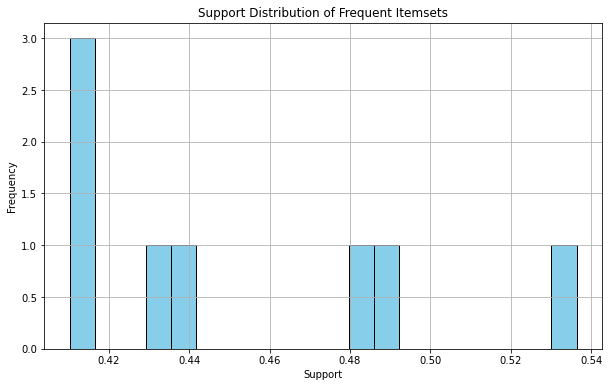

/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/anaconda3/lib/python3.8/site-packages/wordcloud/wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if o

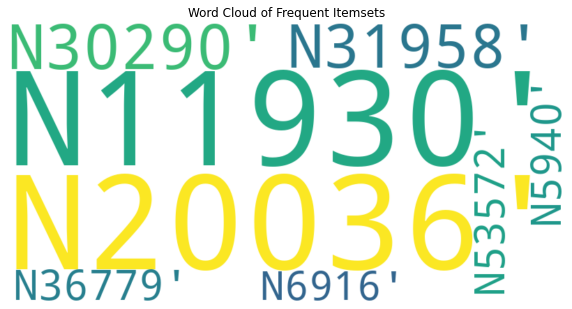

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 支持度分布图
plt.figure(figsize=(10, 6))
plt.hist(frequent_itemsets['support'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Support Distribution of Frequent Itemsets')
plt.grid(True)
plt.show()

# 频繁项集词云
wordcloud_text = ' '.join([str(news_id) for itemset in frequent_itemsets['itemsets'] for news_id in itemset])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Itemsets')
plt.show()


清理本地缓存

In [66]:
shutil.rmtree(temp_dir)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SNAP：Bitcoin Alpha trust weighted signed network数据集

## 1.数据获取与预处理

In [67]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# 读取CSV文件
data = pd.read_csv('soc-sign-bitcoinalpha.csv', names=['SOURCE', 'TARGET', 'RATING', 'TIME'])

# 数据预处理（如果需要的话）
# 这里可能需要进一步的预处理，比如处理缺失值、转换时间格式等

# 将数据按时间进行分组，并将同一时间点下的所有节点关系合并为一个项集
grouped_data = data.groupby('TIME')[['SOURCE', 'TARGET']].apply(lambda x: [node for pair in x.values for node in pair])
print(grouped_data)


TIME
1289192400                [2, 402, 10, 970, 10, 271, 113, 54]
1289365200     [119, 2, 119, 54, 54, 119, 119, 471, 119, 271]
1289451600                                          [168, 74]
1289538000    [271, 2, 271, 54, 271, 113, 271, 119, 271, 471]
1289624400                                 [474, 37, 37, 474]
                                   ...                       
1452747600                   [15, 3443, 15, 3448, 2336, 3449]
1452834000                              [15, 2437, 104, 2437]
1452920400        [906, 279, 281, 3450, 1202, 604, 604, 1202]
1453006800                                        [114, 7370]
1453438800                               [15, 3451, 3451, 98]
Length: 1647, dtype: object


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.频繁模式挖掘

In [68]:
# 编码为可处理格式
te = TransactionEncoder()
basket_encoded = te.fit(grouped_data).transform(grouped_data)
basket_df = pd.DataFrame(basket_encoded, columns=te.columns_)

# 使用Apriori算法挖掘频繁项集
frequent_itemsets = apriori(basket_df, min_support=0.05)

# 输出频繁项集
print(frequent_itemsets)

     support  itemsets
0   0.299939       (0)
1   0.131148       (1)
2   0.105647       (2)
3   0.111111       (3)
4   0.091682       (4)
5   0.091075       (5)
6   0.129326       (6)
7   0.131755       (7)
8   0.091075       (8)
9   0.089253       (9)
10  0.149970      (10)
11  0.075896      (11)
12  0.067395      (12)
13  0.132362      (14)
14  0.059502      (15)
15  0.071038      (16)
16  0.051609      (17)
17  0.071645      (18)
18  0.060109      (20)
19  0.085003      (21)
20  0.070431      (23)
21  0.061931      (24)
22  0.098361      (25)
23  0.055252      (28)
24  0.073467      (29)
25  0.053430      (30)
26  0.054645      (31)
27  0.073467      (32)
28  0.053430      (34)
29  0.051609      (37)
30  0.056466      (39)
31  0.050395      (41)
32  0.054645      (42)
33  0.052823      (50)
34  0.063752      (57)
35  0.055859      (84)
36  0.083789      (94)
37  0.052823     (144)
38  0.113540     (176)
39  0.051609    (2335)
40  0.050395    (3781)
41  0.053430    (0, 2)
42  0.05464

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.模式命名
挖掘了在同一时间内，比特币信任网络节点的信息，因此将模式命名为“比特币信任网络节点”模式

## 4.挖掘结果分析

In [70]:
# 按支持度降序排序，观察支持度较高的频繁项集中包含哪些节点以及节点组合
df_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
print(df_sorted)

     support  itemsets
0   0.299939       (0)
10  0.149970      (10)
13  0.132362      (14)
7   0.131755       (7)
1   0.131148       (1)
6   0.129326       (6)
38  0.113540     (176)
3   0.111111       (3)
2   0.105647       (2)
22  0.098361      (25)
4   0.091682       (4)
5   0.091075       (5)
8   0.091075       (8)
9   0.089253       (9)
19  0.085003      (21)
36  0.083789      (94)
11  0.075896      (11)
24  0.073467      (29)
27  0.073467      (32)
17  0.071645      (18)
15  0.071038      (16)
20  0.070431      (23)
12  0.067395      (12)
34  0.063752      (57)
21  0.061931      (24)
18  0.060109      (20)
14  0.059502      (15)
44  0.058288   (0, 10)
30  0.056466      (39)
35  0.055859      (84)
45  0.055859  (0, 176)
23  0.055252      (28)
32  0.054645      (42)
26  0.054645      (31)
42  0.054645    (0, 6)
28  0.053430      (34)
25  0.053430      (30)
41  0.053430    (0, 2)
33  0.052823      (50)
37  0.052823     (144)
29  0.051609      (37)
39  0.051609    (2335)
16  0.05160

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.可视化展示

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


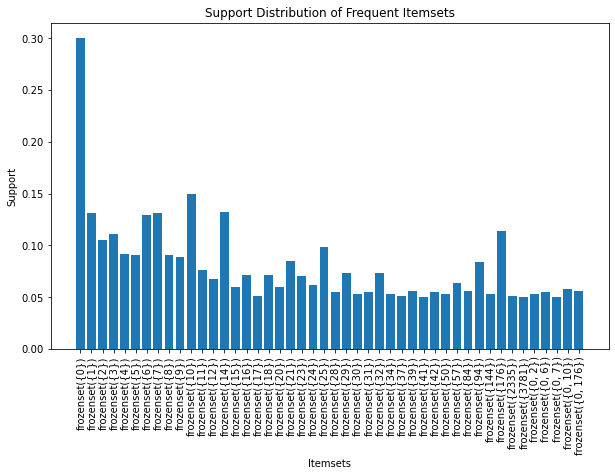

In [69]:
plt.figure(figsize=(10,6))
plt.bar(range(len(frequent_itemsets)), frequent_itemsets['support'], tick_label=frequent_itemsets['itemsets'].astype(str))
plt.xticks(rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Support Distribution of Frequent Itemsets')
plt.show()